In [1]:
%matplotlib inline

In [2]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])

In [3]:
car_df.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [4]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

### Machine learning algorithms can't handle objects(strings)  they have to be converted in numbers

In [5]:
car_df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [6]:
for col in car_df.columns:
    if(car_df[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,car_df[col].unique()))

Unique values in normalized_losses = ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
Unique values in make = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Unique values in fuel_type = ['gas' 'diesel']
Unique values in aspiration = ['std' 'turbo']
Unique values in num_of_doors = ['two' 'four' '?']
Unique values in body_style = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in drive_wheels = ['rwd' 'fwd' '4wd']
Unique values in engine_location = ['front' 'rear']
Unique values in engine_type = ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique v

In [7]:
car_df = car_df.drop(['make','fuel_type','engine_location','num_of_doors','body_style','drive_wheels','engine_type','fuel_system','aspiration','normalized_losses'],axis = 1)



In [8]:
car_df

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470


In [9]:
car_df.dtypes.count()

16

In [10]:
# if the coloumn is not ordinal( ex Gender column) we can't blindly convert it into 0 and 1 
# if the column is in ordinal we can convert it into 1 , 2 and so on

In [11]:
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five':5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12})

In [12]:
car_df = car_df.replace('?', np.nan)  #replace ? with NA which is equivalent of NULl


In [13]:
#Change the attribute types from object to float type (generic numeric types) 
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke']= car_df['stroke'].astype('float64')
car_df['horsepower']= car_df['horsepower'].astype('float64')
car_df['peak_rpm']= car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

In [14]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [15]:
# fill up NaN in numeric columns with median values of those columns respectively
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore']= car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())

In [16]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


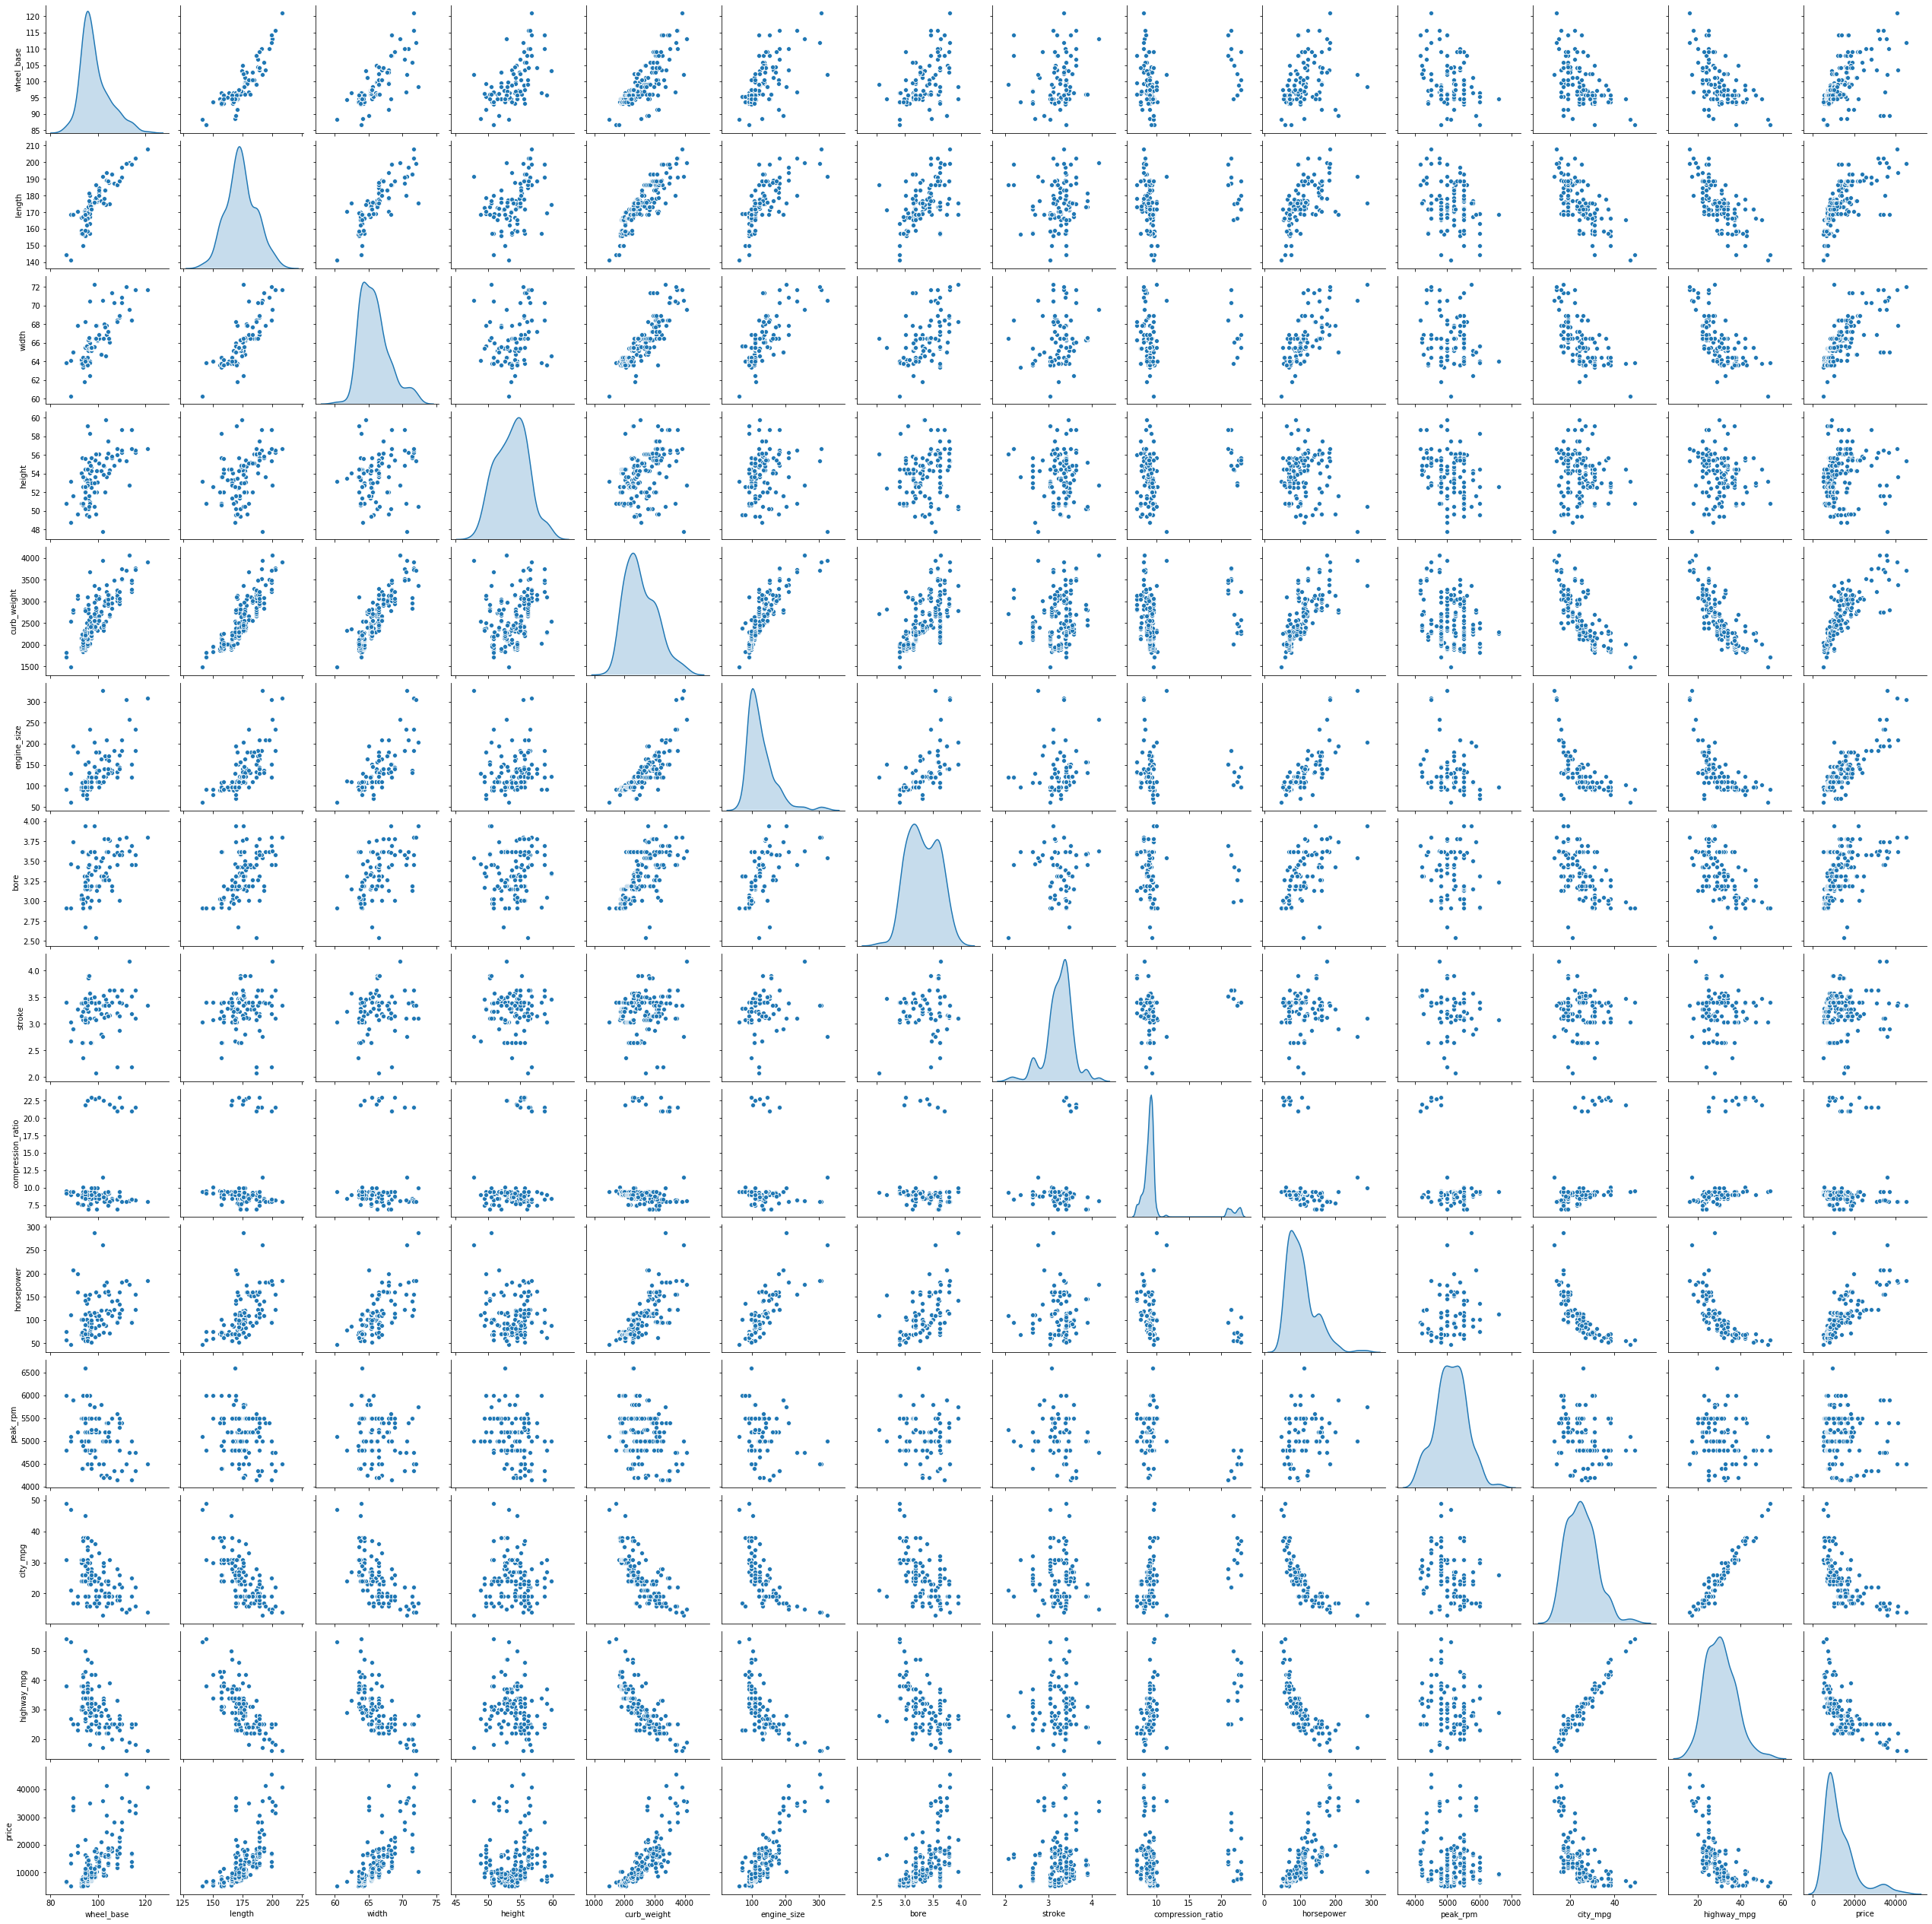

In [17]:
import seaborn as sns
car_df_attr = car_df.iloc[:,1:16]

sns.pairplot(car_df_attr , diag_kind = 'kde')

In [18]:
car_df.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'num_of_cylinders', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'cylinder'],
      dtype='object')

In [19]:
X = car_df.drop('price', axis=1)
X = X.drop('num_of_cylinders', axis=1) #Removing this column as we have created another column "cylinder" out of this
y = car_df[['price']]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [22]:
X_train

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinder
14,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,6
162,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34,4
59,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,4
19,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,4
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,99.1,186.6,66.5,56.1,2695,121,3.54,3.07,9.3,110.0,5250.0,21,28,4
137,2,99.1,186.6,66.5,56.1,2847,121,3.54,3.07,9.0,160.0,5500.0,19,26,4
72,3,96.6,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,155.0,4750.0,16,18,8
140,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73.0,4400.0,26,31,4


In [23]:
regression_model = LinearRegression()

In [24]:
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for symboling is 88.57794900973566
The coefficient for wheel_base is 71.82402760934986
The coefficient for length is -93.3844787201191
The coefficient for width is 479.81643559267866
The coefficient for height is 315.2038400121214
The coefficient for curb_weight is -0.8657326891351419
The coefficient for engine_size is 251.74362582792023
The coefficient for bore is -6832.550987635414
The coefficient for stroke is -5085.81885979059
The coefficient for compression_ratio is 335.7682519296386
The coefficient for horsepower is -0.03898796131217402
The coefficient for peak_rpm is 2.4300494935823127
The coefficient for city_mpg is -201.81713200347048
The coefficient for highway_mpg is -41.934319357320746
The coefficient for cylinder is -3176.176090372959


In [30]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -12323.060174569477


In [26]:
y_pred = regression_model.predict(X_test)

In [29]:
# two ways to calculate the r^2 

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8362176483290366

In [28]:
regression_model.score(X_test, y_test)

0.8362176483290366